In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn import linear_model
from sklearn.utils import shuffle
from sklearn.svm import SVR
np.random.seed(42)

In [16]:
df=pd.read_excel('/kaggle/input/dataset1/dataset1.xlsx', index_col=0)  
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 655 entries, 36.0 to nan
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Number_Of_Atoms                 655 non-null    int64  
 1   Temperature                     655 non-null    float64
 2   Step_Size                       655 non-null    float64
 3   Localization_Method             655 non-null    object 
 4   Number_of_Itrerations           655 non-null    int64  
 5   success                         655 non-null    int64  
 6   Number_of_Evaluations_function  655 non-null    int64  
 7   Number_of_Evaluations_Jacobian  655 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 46.1+ KB


We can see that much more evaluations belong to 'BFGS' than 'L-BFGS-B'. In addition more elgible results ('success') belong to 'L-BFGS-B'.

In [56]:
df.groupby(by=["Localization_Method"]).sum()

,Number_Of_Atoms,Temperature,Step_Size,Number_of_Itrerations,success,Number_of_Evaluations_function,Number_of_Evaluations_Jacobian
Localization_Method,,,,,,,
BFGS,5920,8055.626743,761.950216,20018472,64,209817722,202662972
L-BFGS-B,6336,8973.668154,936.917415,549275,271,46768133,46768133


In [57]:
df=pd.read_excel('/kaggle/input/dataset2/dataset2.xlsx', index_col=0)  
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 905 entries, 1 to 905
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Number_Of_Atoms                 905 non-null    int64  
 1   Temperature                     905 non-null    float64
 2   Step_Size                       905 non-null    float64
 3   Number_of_Evaluations_function  905 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 35.4 KB


<Axes: xlabel='Number_Of_Atoms', ylabel='Count'>

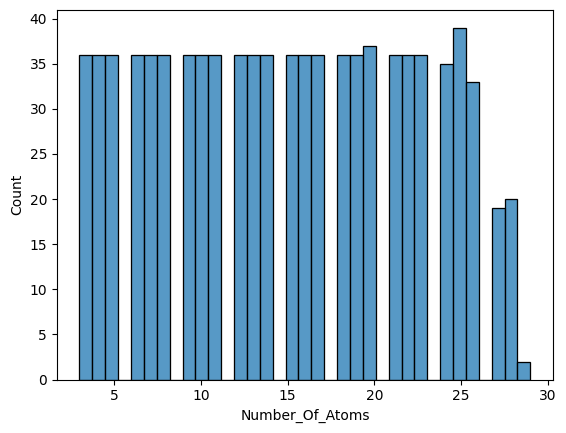

In [58]:
sns.histplot(data=df, x="Number_Of_Atoms", bins=35)

Text(0.5, 1.0, 'Number of Atoms as a Function of Evaluations ')

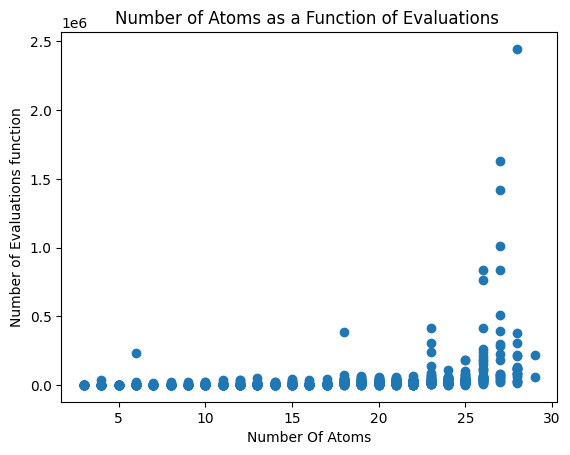

In [59]:
plt.scatter(df['Number_Of_Atoms'], df['Number_of_Evaluations_function'])
plt.xlabel('Number Of Atoms')
plt.ylabel('Number of Evaluations function')
plt.title('Number of Atoms as a Function of Evaluations ')

Text(0.5, 1.0, 'Temperature as a Function of Evaluations ')

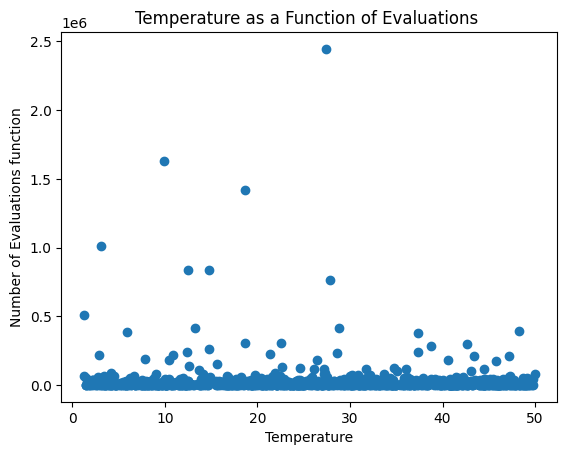

In [60]:
plt.scatter(df['Temperature'], df['Number_of_Evaluations_function'])
plt.xlabel('Temperature')
plt.ylabel('Number of Evaluations function')
plt.title('Temperature as a Function of Evaluations ')

Text(0.5, 1.0, 'Step Size as a Function of Evaluations ')

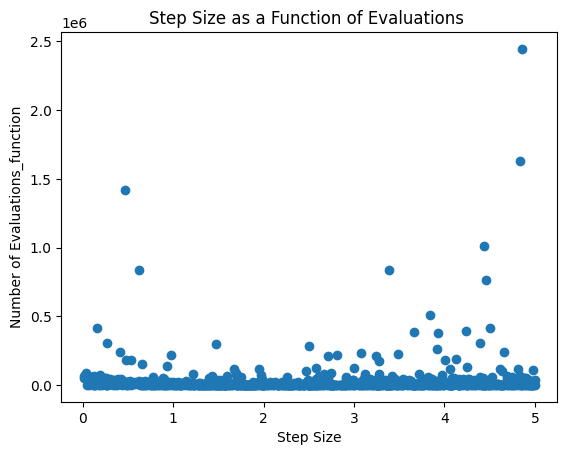

In [61]:
plt.scatter(df['Step_Size'], df['Number_of_Evaluations_function'])
plt.xlabel('Step Size')
plt.ylabel('Number of Evaluations_function')
plt.title('Step Size as a Function of Evaluations ')

In [62]:
print(len(df.loc[(df['Number_of_Evaluations_function'] >90000)]))

df.loc[(df['Number_of_Evaluations_function'] >90000)]

44


,Number_Of_Atoms,Temperature,Step_Size,Number_of_Evaluations_function
serial,,,,
85,6,28.610428,3.077822,235154
299,18,5.898690,3.667720,387373
389,23,13.292288,0.154561,412472
396,23,12.571814,0.931088,136116
429,25,35.067909,4.636888,104010
432,25,40.599912,0.534204,182259
434,26,14.766313,3.917316,258854
438,26,45.805235,3.276763,175570
441,26,43.079058,2.466253,99484


In [63]:
df.drop(df.loc[(df['Number_of_Evaluations_function'] >90000)].index, inplace=True)

In [64]:
x=df.drop(['Number_of_Evaluations_function'],axis=1) 
y=df['Number_of_Evaluations_function']
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.2,random_state=42, shuffle=True)
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

lm = LinearRegression()
lm.fit(X_train,y_train)
predictions_linear = lm.predict(X_test)

print("RMSE Linear:",metrics.mean_squared_error(y_test, predictions_linear,squared=False))
print("R2: Linear",r2_score(y_test, predictions_linear))
      
poly = PolynomialFeatures(degree=4)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.fit_transform(X_test)


poly.fit(X_poly_train, y_train)
lin2 = LinearRegression()
lin2.fit(X_poly_train, y_train)
predictions_poly = lin2.predict(X_poly_test)
print("RMSE Poly:",metrics.mean_squared_error(y_test, predictions_poly,squared=False))
print("R2 Poly:",r2_score(y_test, predictions_poly))

RMSE Linear: 12969.21774605118
R2: Linear 0.3952334461095618
RMSE Poly: 9755.657667645246
R2 Poly: 0.6578052789005304


In [65]:
x=df.drop(['Number_of_Evaluations_function','Temperature'],axis=1) 
y=df['Number_of_Evaluations_function']
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.2,random_state=42, shuffle=True)
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

lm = LinearRegression()
lm.fit(X_train,y_train)
predictions_linear = lm.predict(X_test)

print("RMSE Linear:",metrics.mean_squared_error(y_test, predictions_linear,squared=False))
print("R2: Linear",r2_score(y_test, predictions_linear))
      
poly = PolynomialFeatures(degree=4)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.fit_transform(X_test)


poly.fit(X_poly_train, y_train)
lin2 = LinearRegression()
lin2.fit(X_poly_train, y_train)
predictions_poly = lin2.predict(X_poly_test)
print("RMSE Poly:",metrics.mean_squared_error(y_test, predictions_poly,squared=False))
print("R2 Poly:",r2_score(y_test, predictions_poly))

RMSE Linear: 12976.160179302538
R2: Linear 0.394585808717802
RMSE Poly: 9477.852344727964
R2 Poly: 0.6770166920510476


In [66]:
x=df.drop(['Number_of_Evaluations_function','Step_Size'],axis=1) 
y=df['Number_of_Evaluations_function']
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.2,random_state=42, shuffle=True)
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

lm = LinearRegression()
lm.fit(X_train,y_train)
predictions_linear = lm.predict(X_test)

print("RMSE Linear:",metrics.mean_squared_error(y_test, predictions_linear,squared=False))
print("R2: Linear",r2_score(y_test, predictions_linear))
      
poly = PolynomialFeatures(degree=4)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.fit_transform(X_test)


poly.fit(X_poly_train, y_train)
lin2 = LinearRegression()
lin2.fit(X_poly_train, y_train)
predictions_poly = lin2.predict(X_poly_test)
print("RMSE Poly:",metrics.mean_squared_error(y_test, predictions_poly,squared=False))
print("R2 Poly:",r2_score(y_test, predictions_poly))

RMSE Linear: 12900.467461529788
R2: Linear 0.4016282295992293
RMSE Poly: 11651.157346150656
R2 Poly: 0.5119117691041755


In [67]:
x=df.drop(['Number_of_Evaluations_function','Step_Size','Temperature'],axis=1) 
y=df['Number_of_Evaluations_function']
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.2,random_state=42, shuffle=True)
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

lm = LinearRegression()
lm.fit(X_train,y_train)
predictions_linear = lm.predict(X_test)

print("RMSE Linear:",metrics.mean_squared_error(y_test, predictions_linear,squared=False))
print("R2: Linear",r2_score(y_test, predictions_linear))
      
poly = PolynomialFeatures(degree=4)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.fit_transform(X_test)


poly.fit(X_poly_train, y_train)
lin2 = LinearRegression()
lin2.fit(X_poly_train, y_train)
predictions_poly = lin2.predict(X_poly_test)
print("RMSE Poly:",metrics.mean_squared_error(y_test, predictions_poly,squared=False))
print("R2 Poly:",r2_score(y_test, predictions_poly))

RMSE Linear: 12907.218290373059
R2: Linear 0.4010018085245689
RMSE Poly: 11620.429921965251
R2 Poly: 0.5144828299984219


In [68]:
df=pd.read_excel('/kaggle/input/dataset3/dataset3.xlsx', index_col=0)  
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Temperature                     100 non-null    float64
 1   Step_Size                       100 non-null    float64
 2   Number_of_Evaluations_function  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 3.1 KB


{'whiskers': [<matplotlib.lines.Line2D at 0x7abdff1f8d00>,
 'caps': [<matplotlib.lines.Line2D at 0x7abdff1f92a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7abdff1f8a60>],
 'medians': [<matplotlib.lines.Line2D at 0x7abdff1f97e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7abdff1f9a80>],
 'means': []}

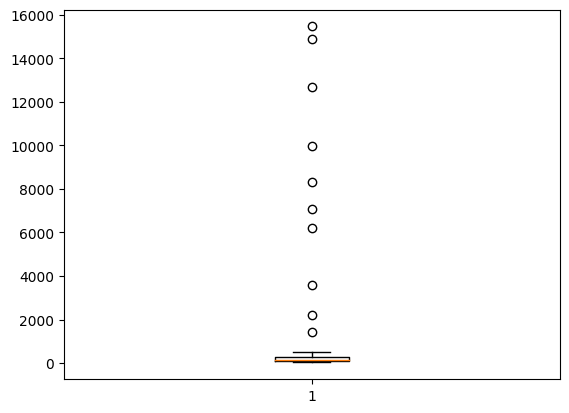

In [69]:
plt.boxplot(df['Number_of_Evaluations_function'])

In [70]:
x=df.drop(['Number_of_Evaluations_function'],axis=1) 
y=df['Number_of_Evaluations_function']
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.2,random_state=42, shuffle=True)
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

lm = LinearRegression()
lm.fit(X_train,y_train)
predictions_linear = lm.predict(X_test)
print("-----Train-----")
print("RMSE Linear:",metrics.mean_squared_error(y_train, lm.predict(X_train),squared=False))
print("R2: Linear",r2_score(y_train, lm.predict(X_train)))
print("-----Test-----")
print("RMSE Linear:",metrics.mean_squared_error(y_test, predictions_linear,squared=False))
print("R2: Linear",r2_score(y_test, predictions_linear))
      
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.fit_transform(X_test)


poly.fit(X_poly_train, y_train)
lin2 = LinearRegression()
lin2.fit(X_poly_train, y_train)

predictions_poly = lin2.predict(X_poly_test)
print("-----Train-----")
print("RMSE Poly:",metrics.mean_squared_error(y_train, lin2.predict(X_poly_train),squared=False))
print("R2 Poly:",r2_score(y_train, lin2.predict(X_poly_train)))
print("-----Test-----")
print("RMSE Poly:",metrics.mean_squared_error(y_test,predictions_poly,squared=False))
print("R2 Poly:",r2_score(y_test, predictions_poly))

-----Train-----
RMSE Linear: 2785.2931380060563
R2: Linear 0.1625118123140018
-----Test-----
RMSE Linear: 1700.6688601849853
R2: Linear 0.09400403573396998
-----Train-----
RMSE Poly: 2613.412032858434
R2 Poly: 0.2626857210555341
-----Test-----
RMSE Poly: 1437.340237383136
R2 Poly: 0.3528485765305277


In [71]:
print(len(df.loc[(df['Number_of_Evaluations_function'] >1900)]))

df.drop(df.loc[(df['Number_of_Evaluations_function'] >1900)].index, inplace=True)

9


In [72]:
x=df.drop(['Number_of_Evaluations_function'],axis=1) 
y=df['Number_of_Evaluations_function']
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.2,random_state=42, shuffle=True)
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

lm = LinearRegression()
lm.fit(X_train,y_train)
predictions_linear = lm.predict(X_test)
print("-----Train-----")
print("RMSE Linear:",metrics.mean_squared_error(y_train, lm.predict(X_train),squared=False))
print("R2: Linear",r2_score(y_train, lm.predict(X_train)))
print("-----Test-----")
print("RMSE Linear:",metrics.mean_squared_error(y_test, predictions_linear,squared=False))
print("R2: Linear",r2_score(y_test, predictions_linear))
      
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.fit_transform(X_test)


poly.fit(X_poly_train, y_train)
lin2 = LinearRegression()
lin2.fit(X_poly_train, y_train)

predictions_poly = lin2.predict(X_poly_test)
print("-----Train-----")
print("RMSE Poly:",metrics.mean_squared_error(y_train, lin2.predict(X_poly_train),squared=False))
print("R2 Poly:",r2_score(y_train, lin2.predict(X_poly_train)))
print("-----Test-----")
print("RMSE Poly:",metrics.mean_squared_error(y_test,predictions_poly,squared=False))
print("R2 Poly:",r2_score(y_test, predictions_poly))

-----Train-----
RMSE Linear: 191.0683235038063
R2: Linear 0.0517554254291841
-----Test-----
RMSE Linear: 138.8757366458225
R2: Linear -0.14686465279025707
-----Train-----
RMSE Poly: 190.7115905876401
R2 Poly: 0.05529294817117769
-----Test-----
RMSE Poly: 137.14549610993018
R2 Poly: -0.11846530344787243


In [73]:
df=pd.read_excel('/kaggle/input/dataset4/dataset4.xlsx', index_col=0)  
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Temperature                     999 non-null    float64
 1   Step_Size                       999 non-null    float64
 2   Number_of_Evaluations_function  999 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 31.2 KB


{'whiskers': [<matplotlib.lines.Line2D at 0x7abdff0eb040>,
 'caps': [<matplotlib.lines.Line2D at 0x7abdff0eb580>,
 'boxes': [<matplotlib.lines.Line2D at 0x7abdff0eada0>],
 'medians': [<matplotlib.lines.Line2D at 0x7abdff0ebac0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7abdff0ebd60>],
 'means': []}

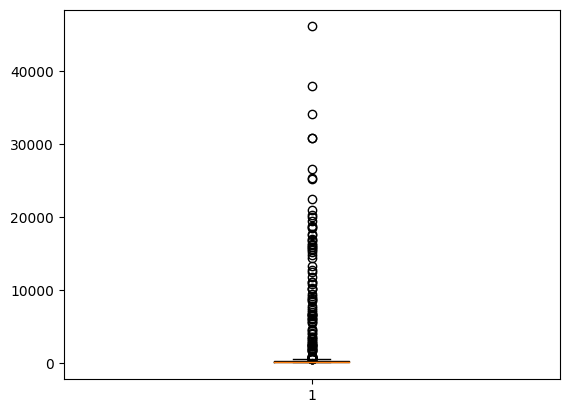

In [74]:
plt.boxplot(df['Number_of_Evaluations_function'])

In [75]:
x=df.drop(['Number_of_Evaluations_function'],axis=1) 
y=df['Number_of_Evaluations_function']
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.2,random_state=42, shuffle=True)
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

lm = LinearRegression()
lm.fit(X_train,y_train)
predictions_linear = lm.predict(X_test)
print("-----Train-----")
print("RMSE Linear:",metrics.mean_squared_error(y_train, lm.predict(X_train),squared=False))
print("R2: Linear",r2_score(y_train, lm.predict(X_train)))
print("-----Test-----")
print("RMSE Linear:",metrics.mean_squared_error(y_test, predictions_linear,squared=False))
print("R2: Linear",r2_score(y_test, predictions_linear))
      
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.fit_transform(X_test)


poly.fit(X_poly_train, y_train)
lin2 = LinearRegression()
lin2.fit(X_poly_train, y_train)

predictions_poly = lin2.predict(X_poly_test)
print("-----Train-----")
print("RMSE Poly:",metrics.mean_squared_error(y_train, lin2.predict(X_poly_train),squared=False))
print("R2 Poly:",r2_score(y_train, lin2.predict(X_poly_train)))
print("-----Test-----")
print("RMSE Poly:",metrics.mean_squared_error(y_test,predictions_poly,squared=False))
print("R2 Poly:",r2_score(y_test, predictions_poly))

-----Train-----
RMSE Linear: 3728.7966223606472
R2: Linear 0.12384502846314938
-----Test-----
RMSE Linear: 4315.586367413272
R2: Linear 0.0945216840241393
-----Train-----
RMSE Poly: 3421.8939173499734
R2 Poly: 0.26213549326580765
-----Test-----
RMSE Poly: 4087.364588605437
R2 Poly: 0.18775848072531898


In [76]:
print(len(df.loc[(df['Number_of_Evaluations_function'] >1900)]))

df.drop(df.loc[(df['Number_of_Evaluations_function'] >1900)].index, inplace=True)

81


In [77]:
x=df.drop(['Number_of_Evaluations_function'],axis=1) 
y=df['Number_of_Evaluations_function']
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.2,random_state=42, shuffle=True)
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

lm = LinearRegression()
lm.fit(X_train,y_train)
predictions_linear = lm.predict(X_test)
print("-----Train-----")
print("RMSE Linear:",metrics.mean_squared_error(y_train, lm.predict(X_train),squared=False))
print("R2: Linear",r2_score(y_train, lm.predict(X_train)))
print("-----Test-----")
print("RMSE Linear:",metrics.mean_squared_error(y_test, predictions_linear,squared=False))
print("R2: Linear",r2_score(y_test, predictions_linear))
      
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.fit_transform(X_test)


poly.fit(X_poly_train, y_train)
lin2 = LinearRegression()
lin2.fit(X_poly_train, y_train)

predictions_poly = lin2.predict(X_poly_test)
print("-----Train-----")
print("RMSE Poly:",metrics.mean_squared_error(y_train, lin2.predict(X_poly_train),squared=False))
print("R2 Poly:",r2_score(y_train, lin2.predict(X_poly_train)))
print("Cross Validation:", cross_val_score(lin2, X_poly_train, y_train, scoring='r2',cv=5))
print("-----Test-----")
print("RMSE Poly:",metrics.mean_squared_error(y_test,predictions_poly,squared=False))
print("R2 Poly:",r2_score(y_test, predictions_poly))

-----Train-----
RMSE Linear: 169.0773780147248
R2: Linear 0.038518952630891
-----Test-----
RMSE Linear: 200.1712735430447
R2: Linear 0.011734093313825134
-----Train-----
RMSE Poly: 168.8067996441997
R2 Poly: 0.041593850188216375
Cross Validation: [ 0.01143671  0.04923137 -0.01840484  0.09629298  0.05300676]
-----Test-----
RMSE Poly: 200.5119341029655
R2 Poly: 0.00836747945828975


In [2]:
df=pd.read_excel('/kaggle/input/dataset5/dataset5.xlsx', index_col=0)  
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Number_Of_Atoms                 100 non-null    int64  
 1   Temperature                     100 non-null    int64  
 2   Step_Size                       100 non-null    float64
 3   Number_of_Itrerations           100 non-null    int64  
 4   Energy                          100 non-null    float64
 5   Initial_Parameters              100 non-null    object 
 6   Number_of_Evaluations_function  100 non-null    int64  
 7   Number_of_Evaluations_Jacobian  100 non-null    int64  
 8   Final_Coordinates               100 non-null    object 
 9   Threshold                       100 non-null    float64
dtypes: float64(3), int64(5), object(2)
memory usage: 8.6+ KB


Text(0.5, 1.0, 'Histplot of The Number of Iterations')

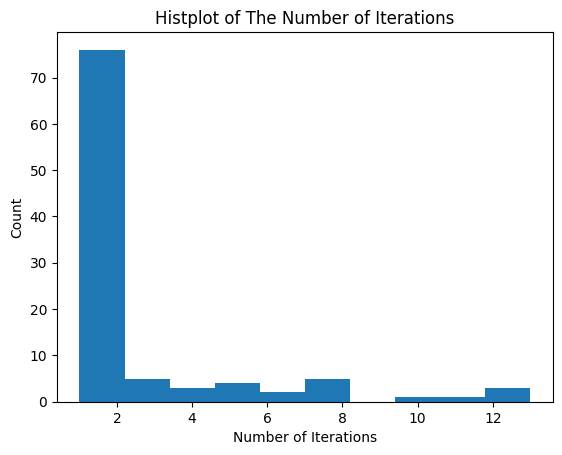

In [3]:
plt.hist(df['Number_of_Itrerations'])
plt.xlabel('Number of Iterations')
plt.ylabel('Count')
plt.title('Histplot of The Number of Iterations')

In [5]:
df.groupby("Number_of_Itrerations")['Number_of_Evaluations_function'].std()

Number_of_Itrerations
1     10.464684
2     11.034656
3     17.725688
4     22.030282
5     32.325171
6      4.242641
7           NaN
8     33.747839
10          NaN
11          NaN
12          NaN
13    43.840620
Name: Number_of_Evaluations_function, dtype: float64

In [6]:
df.groupby("Number_of_Itrerations")['Number_of_Evaluations_function'].mean()

Number_of_Itrerations
1      57.076923
2     110.181818
3     178.800000
4     223.333333
5     259.250000
6     316.000000
7     356.000000
8     390.250000
10    553.000000
11    587.000000
12    628.000000
13    677.000000
Name: Number_of_Evaluations_function, dtype: float64

In [44]:
df=pd.read_excel('/kaggle/input/dataset6/dataset6.xlsx', index_col=0)  
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Number_Of_Atoms                 100000 non-null  int64  
 1   Temperature                     100000 non-null  float64
 2   Step_Size                       100000 non-null  float64
 3   Number_of_Itrerations           100000 non-null  int64  
 4   Energy                          100000 non-null  float64
 5   Initial_Parameters              100000 non-null  object 
 6   Number_of_Evaluations_function  100000 non-null  int64  
 7   Number_of_Evaluations_Jacobian  100000 non-null  int64  
 8   Final_Coordinates               100000 non-null  object 
 9   Threshold                       100000 non-null  float64
 10  trial                           100000 non-null  int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 9.2+ MB


<Axes: xlabel='Number_Of_Atoms', ylabel='Count'>

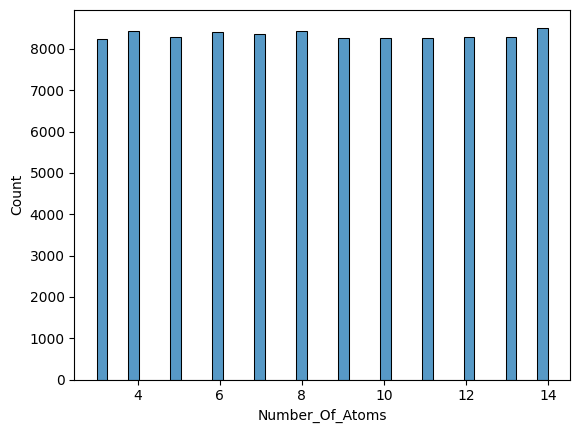

In [9]:
sns.histplot(data=df, x="Number_Of_Atoms")

In [10]:
df.groupby(by=["Number_Of_Atoms"]).sum()

,Temperature,Step_Size,Number_of_Itrerations,Energy,Initial_Parameters,Number_of_Evaluations_function,Number_of_Evaluations_Jacobian,Final_Coordinates,Threshold,trial
Number_Of_Atoms,,,,,,,,,,
3,209178.453036,20753.381857,8321,-24690.000000,[-0.50486588 -2.98782641 -1.73504621 2.282159...,359272,359272,[ 0.79211293 -3.72445686 -1.87692064 2.877078...,-24690.000000,11384
4,213569.889107,21082.395653,8483,-50586.000000,[-0.82687862 1.01565323 0.1900779 -2.517078...,514790,514790,[-0.82687887 1.01565365 0.19007804 -2.517078...,-50586.000000,11199
5,212847.729439,20970.910228,8301,-75434.521115,[-0.82059577 -1.41938612 1.63918361 1.400103...,571214,571214,[-0.82059278 -1.41938531 1.63918154 1.400107...,-75434.517672,10971
6,214260.472059,20907.664690,805745,-106867.034297,[ 1.50872021 -1.93558592 3.59139453 2.850177...,23512257,23512257,[ 1.66193767 1.60313543 -1.05271938 -1.214222...,-106870.305234,805345
7,213389.433027,20760.041244,846774,-137795.971919,[ 4.37478115 -3.18939733 -1.66833195 0.637241...,17371260,17371260,[ 4.37478177 -3.18939701 -1.66833955 0.637233...,-137819.956400,649609
8,216931.468112,21094.511274,326238,-166946.374641,[ 2.30726838 -0.24288424 -0.66660983 2.212045...,8807563,8807563,[ 2.30770512 -0.5611966 2.66747376 1.149447...,-166956.401847,329069
9,210649.674118,20819.031262,841098,-198891.681381,[ 1.54278942 -2.14102541 -2.64041322 3.885630...,19831967,19831967,[ 1.58325793e+00 -2.30884236e+00 -2.69976434e+...,-198959.333360,643660
10,208682.369426,20411.277279,848921,-234974.251785,[ 0.43497385 3.71178889 -0.88457858 -2.588569...,29392894,29392894,[ 0.43498219 3.71179808 -0.88458444 -2.588574...,-235082.762172,849966
11,210063.207939,20777.268520,850733,-270837.527814,[-3.23583221 -3.07250718 -4.79975736 3.311414...,32840935,32840935,[-1.2612359 1.15828354 -2.19558692 3.144585...,-271105.635780,847074


<Axes: xlabel='Number_Of_Atoms'>

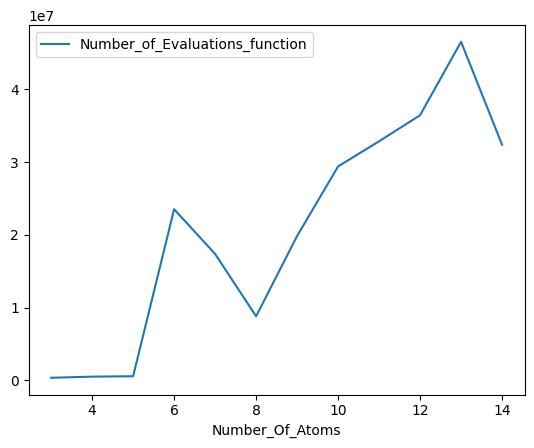

In [83]:
df.groupby('Number_Of_Atoms')['Number_of_Evaluations_function'].sum().plot(legend=True)

<Axes: >

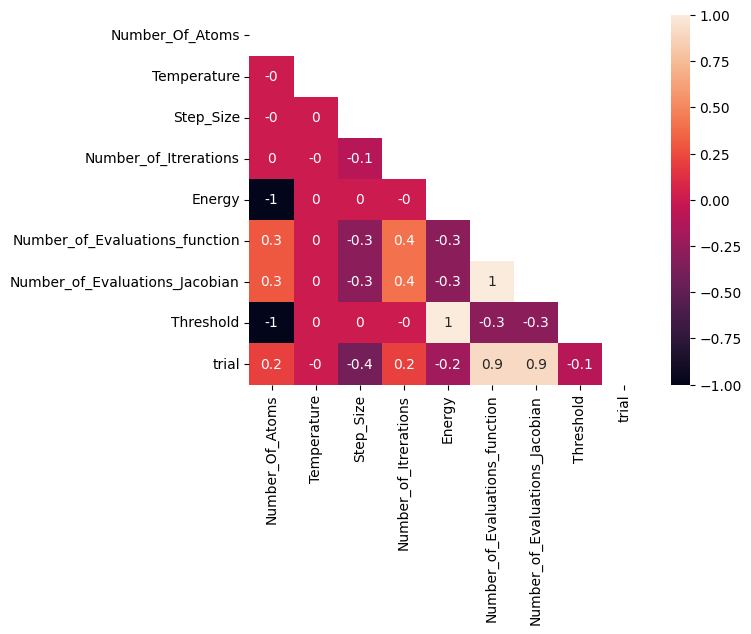

In [84]:
correlation = df.corr(method='pearson', numeric_only=True)
np.triu(correlation)
sns.heatmap(correlation.round(1),annot=True,mask=np.triu(correlation))

In [47]:
df['Initial_Parameters'] = df['Initial_Parameters'].apply(lambda x:np.fromstring(str(x).replace('\n', '').replace(']','').replace('[',''), sep=' '))
df['Final_Coordinates'] = df['Final_Coordinates'].apply(lambda x:np.fromstring(str(x).replace('\n', '').replace(']','').replace('[',''), sep=' '))
df['dif'] = df.Initial_Parameters.sub(df.Final_Coordinates)
df['dif']=df['dif'].apply(lambda x: abs(sum(x)))

In [48]:
df=df.drop(['Number_of_Evaluations_Jacobian','trial', 'Threshold','Energy','Initial_Parameters', 'Final_Coordinates','Number_of_Itrerations' ],axis=1) 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Number_Of_Atoms                 100000 non-null  int64  
 1   Temperature                     100000 non-null  float64
 2   Step_Size                       100000 non-null  float64
 3   Number_of_Evaluations_function  100000 non-null  int64  
 4   dif                             100000 non-null  float64
dtypes: float64(3), int64(2)
memory usage: 4.6 MB


In [50]:
def get_symmetry_group(Number_Of_Atoms):
    if Number_Of_Atoms ==3 or Number_Of_Atoms==5 :
        return 12
    elif Number_Of_Atoms ==4 :
        return 24
    elif Number_Of_Atoms==6:
        return 48
    elif Number_Of_Atoms==7 or Number_Of_Atoms==19:
        return 20
    elif Number_Of_Atoms==8 or Number_Of_Atoms==16 or Number_Of_Atoms==17:
        return 2
    elif Number_Of_Atoms==9 or Number_Of_Atoms==11 or Number_Of_Atoms==15 or Number_Of_Atoms==20:
        return 4
    elif Number_Of_Atoms==10 or Number_Of_Atoms==14:
        return 6
    elif Number_Of_Atoms==12 or Number_Of_Atoms==18:
        return 10
    else:
        return 120

In [51]:
df['Symmetry']=df['Number_Of_Atoms'].apply(get_symmetry_group)
df['symmetry*NA'] = (df['Number_Of_Atoms']*df['Symmetry'])
df.head()

,Number_Of_Atoms,Temperature,Step_Size,Number_of_Evaluations_function,dif,Symmetry,symmetry*NA
0,10,1.004322,0.948523,39,2.000000e-08,6,60
1,13,26.451393,2.909512,379,3.480597e+00,120,1560
2,5,14.143051,4.015668,83,1.000000e-08,12,60
3,13,46.600813,3.339872,131,1.628023e+01,120,1560
4,5,28.488217,1.570928,50,9.853229e-16,12,60


<Axes: >

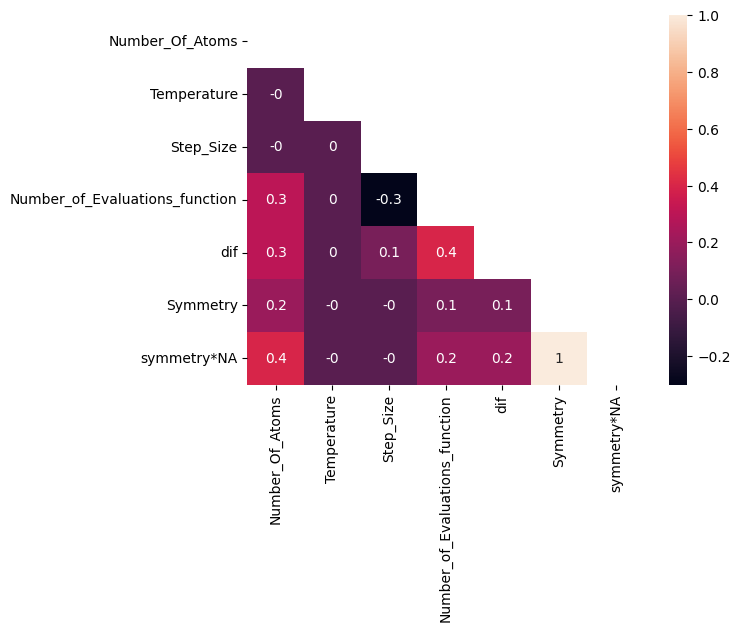

In [39]:
correlation = df.corr(method='pearson', numeric_only=True)
np.triu(correlation)
sns.heatmap(correlation.round(1),annot=True,mask=np.triu(correlation))

{'whiskers': [<matplotlib.lines.Line2D at 0x78cbd6095ea0>,
 'caps': [<matplotlib.lines.Line2D at 0x78cbd60963e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x78cbd6095c00>],
 'medians': [<matplotlib.lines.Line2D at 0x78cbd6096920>],
 'fliers': [<matplotlib.lines.Line2D at 0x78cbd6096bc0>],
 'means': []}

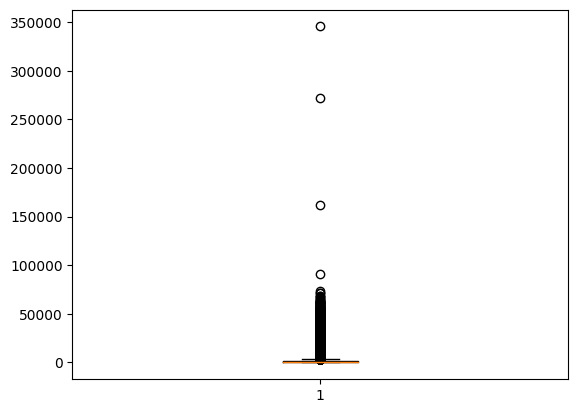

In [30]:
plt.boxplot(df['Number_of_Evaluations_function'])

In [31]:
df.loc[(df['Number_of_Evaluations_function'] >90000)]

,Number_Of_Atoms,Temperature,Step_Size,Number_of_Evaluations_function,dif,Symmetry,symmetry*NA
21117,9,2.895079,1.597730,345496,8.760265,4,36
28296,7,34.532291,4.069358,271893,61.917813,20,140
71674,13,29.015742,4.805612,162317,114.457150,120,1560
83639,13,22.215546,4.247491,91034,118.547188,120,1560


In [52]:
df.drop(df.loc[(df['Number_of_Evaluations_function'] >90000)].index, inplace=True)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99996 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Number_Of_Atoms                 99996 non-null  int64  
 1   Temperature                     99996 non-null  float64
 2   Step_Size                       99996 non-null  float64
 3   Number_of_Evaluations_function  99996 non-null  int64  
 4   dif                             99996 non-null  float64
 5   Symmetry                        99996 non-null  int64  
 6   symmetry*NA                     99996 non-null  int64  
dtypes: float64(3), int64(4)
memory usage: 6.1 MB


In [54]:
x=df.drop(['Number_of_Evaluations_function'],axis=1) 
y=df['Number_of_Evaluations_function']
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.2,random_state=42, shuffle=True)
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [55]:
lm = LinearRegression()
lm.fit(X_train,y_train)
predictions_linear = lm.predict(X_test)

print("RMSE Linear:",metrics.mean_squared_error(y_test, predictions_linear,squared=False))
print("R2: Linear",r2_score(y_test, predictions_linear))

RMSE Linear: 4926.982093067389
R2: Linear 0.3135188931100823


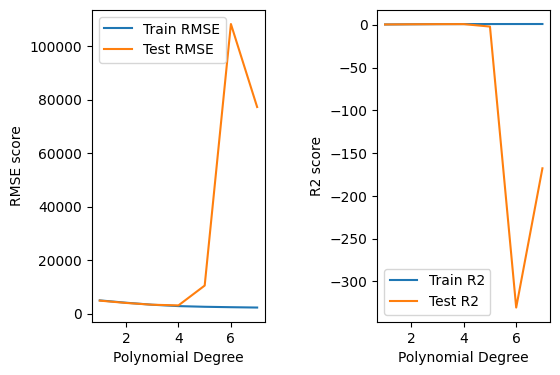

In [57]:
test_rmse=[]
test_r2=[]
train_rmse=[]
train_r2=[]

for i in range (1,8):
    poly = PolynomialFeatures(degree=i)
    X_poly_train = poly.fit_transform(X_train)
    X_poly_test = poly.fit_transform(X_test)
    poly.fit(X_poly_train, y_train)
    lin2 = LinearRegression()
    lin2.fit(X_poly_train, y_train)
    predictions_poly_train = lin2.predict(X_poly_train)
    predictions_poly_test = lin2.predict(X_poly_test)
    test_rmse.append(metrics.mean_squared_error(y_test, predictions_poly_test,squared=False))
    test_r2.append(r2_score(y_test, predictions_poly_test))
    train_rmse.append(metrics.mean_squared_error(y_train, predictions_poly_train,squared=False))
    train_r2.append(r2_score(y_train, predictions_poly_train))

fig,(ax1,ax2)=plt.subplots(1,2)
fig.tight_layout(pad=5)
ax1.plot(range(1,8),train_rmse, label='Train RMSE')
ax1.plot(range(1,8),test_rmse, label='Test RMSE')
ax1.set_xlabel('Polynomial Degree')
ax1.set_ylabel('RMSE score')
ax1.legend()
ax2.plot(range(1,8),train_r2, label='Train R2')
ax2.plot(range(1,8),test_r2, label='Test R2')
ax2.set_xlabel('Polynomial Degree')
ax2.set_ylabel('R2 score')

ax2.legend()




In [37]:
print(train_r2)
print(test_r2)
print('--------')
print(train_rmse)
print(test_rmse)

[0.31358152866213074, 0.5312452214201714, 0.6858816533892087, 0.7739775436134979, 0.8115975747158378, 0.8336436387936873, 0.8504618451976808]
[0.3135188931100823, 0.5337690106630999, 0.675009045811592, 0.7203894863178957, -2.1492185404276083, -330.4460575347543, -167.75121373326948]
--------
[5014.947457733363, 4144.238684752479, 3392.48985624414, 2877.714476778998, 2627.3331826725243, 2468.832423923781, 2340.7116413538806]
[4926.982093067389, 4060.385400919554, 3390.0205098861334, 3144.440909948365, 10552.80927503434, 108261.27014413114, 77248.51542170369]


In [39]:
poly = PolynomialFeatures(degree=4)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.fit_transform(X_test)
poly.fit(X_poly_train, y_train)
lin2 = LinearRegression()
lin2.fit(X_poly_train, y_train)
predictions_poly_test = lin2.predict(X_poly_test)
print("Cross Validation:", cross_val_score(lin2, X_poly_train, y_train, scoring='r2',cv=5))
print("RMSE Poly:",metrics.mean_squared_error(y_test, predictions_poly_test,squared=False))
print("R2 Poly:",r2_score(y_test, predictions_poly_test))

Cross Validation: [0.75400802 0.7747362  0.77414694 0.76325542 0.76451418]
RMSE Poly: 3144.440909948365
R2 Poly: 0.7203894863178957


In [40]:
lasso=Lasso(random_state=42)
search=GridSearchCV(estimator=lasso, param_grid={'alpha':[0.0001,0.001,0.01,0.1,1,10,100]}, n_jobs=1, refit=True, cv=10)
search.fit(X_train, y_train) 
lasso_regression=search.best_estimator_
lasso_regression.fit(X_train, y_train)
predictions_lasso = lasso_regression.predict(X_test)
print("Best Hyperparameter", search.best_params_)
print("RMSE Lasso:",metrics.mean_squared_error(y_test, predictions_lasso,squared=False))
print("R2 Lasso:",r2_score(y_test, predictions_lasso))

Best Hyperparameter {'alpha': 0.0001}
RMSE Lasso: 4926.982087859818
R2 Lasso: 0.31351889456123394


In [41]:
ridge = Ridge(random_state=42)
hyperparameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
search=GridSearchCV(ridge, hyperparameters,scoring='r2',cv=10)
search.fit(X_train,y_train)
ridge_regression=search.best_estimator_
ridge_regression.fit(X_train, y_train)
predictions_ridge = ridge_regression.predict(X_test)

print("Best Hyperparameter", search.best_params_)
print("RMSE Ridge:",metrics.mean_squared_error(y_test, predictions_ridge,squared=False))
print("R2 Ridge:",r2_score(y_test, predictions_ridge))

Best Hyperparameter {'alpha': 30}
RMSE Ridge: 4926.961672385576
R2 Ridge: 0.31352458356437607


In [42]:
svmr = SVR(kernel='poly', degree=3)
svmr.fit(X_train, y_train)
predictions_svmr = svmr.predict(X_test)

#print("Best Hyperparameter", search.best_params_)
print("RMSE SVR:",metrics.mean_squared_error(y_test, predictions_svmr,squared=False))
print("R2 SVR:",r2_score(y_test, predictions_svmr))

RMSE SVR: 6873.000037521058
R2 SVR: -0.33585498079711407


In [28]:
svmr = SVR(kernel='rbf', degree=3)
svmr.fit(X_train, y_train)
predictions_svmr = svmr.predict(X_test)

print("RMSE SVR:",metrics.mean_squared_error(y_test, predictions_svmr,squared=False))
print("R2 SVR:",r2_score(y_test, predictions_svmr))


RMSE SVR: 6068.886991345027
R2 SVR: -0.041561030649756026


In [45]:
param_grid = {'n_estimators': range(25,125,25),"max_depth":range(2,8),"min_samples_split":range(2,10)}
rf = RandomForestRegressor(random_state=42)
rfr = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1,cv=5)
rfr.fit(X_train, y_train)
random_forest = rfr.best_estimator_
random_forest.fit(X_train, y_train)
predictions_rf=random_forest.predict(X_test)

print("Best Hyperparameter", rfr.best_params_)
print("RMSE RF:",metrics.mean_squared_error(y_test, predictions_rf,squared=False))
print("R2 RF:",r2_score(y_test, predictions_rf))

Best Hyperparameter {'max_depth': 7, 'min_samples_split': 3, 'n_estimators': 75}
RMSE RF: 1974.9436705362
R2 RF: 0.8896998640178544


In [13]:
poisson = linear_model.PoissonRegressor()
poisson.fit(X_train, y_train)
predictions_poisson=poisson.predict(X_test)

print("RMSE RF:",metrics.mean_squared_error(y_test, predictions_poisson,squared=False))
print("R2 RF:",r2_score(y_test, predictions_poisson))

RMSE RF: 74255.25596668072
R2 RF: -154.9268913069986


In [23]:
x

,Number_Of_Atoms,Temperature,Step_Size,Symmetry,symmetry*NA
0,10,1.004322,0.948523,6,60
1,13,26.451393,2.909512,120,1560
2,5,14.143051,4.015668,12,60
3,13,46.600813,3.339872,120,1560
4,5,28.488217,1.570928,12,60
...,...,...,...,...,...
99995,13,13.348318,1.750264,120,1560
99996,5,26.173832,0.761749,12,60
99997,10,20.181883,2.413248,6,60
99998,12,6.097543,1.501701,10,120


In [29]:
x=df.drop(['Temperature','Number_of_Evaluations_function','Symmetry'],axis=1) 
y=df['Number_of_Evaluations_function']
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.2,random_state=42, shuffle=True)
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [30]:
x

,Number_Of_Atoms,Step_Size,dif,symmetry*NA
0,10,0.948523,2.000000e-08,60
1,13,2.909512,3.480597e+00,1560
2,5,4.015668,1.000000e-08,60
3,13,3.339872,1.628023e+01,1560
4,5,1.570928,9.853229e-16,60
...,...,...,...,...
99995,13,1.750264,1.204240e+01,1560
99996,5,0.761749,1.000000e-08,60
99997,10,2.413248,1.943291e+01,60
99998,12,1.501701,9.258767e+00,120


In [31]:
lm = LinearRegression()
lm.fit(X_train,y_train)
predictions_linear = lm.predict(X_test)

print("RMSE Linear:",metrics.mean_squared_error(y_test, predictions_linear,squared=False))
print("R2: Linear",r2_score(y_test, predictions_linear))

RMSE Linear: 4927.047218446229
R2: Linear 0.3135007450280388


In [32]:
lasso=Lasso(random_state=42)
search=GridSearchCV(estimator=lasso, param_grid={'alpha':[0.0001,0.001,0.01,0.1,1,10,100]}, n_jobs=1, refit=True, cv=10)
search.fit(X_train, y_train) 
lasso_regression=search.best_estimator_
lasso_regression.fit(X_train, y_train)
predictions_lasso = lasso_regression.predict(X_test)
print("Best Hyperparameter", search.best_params_)
print("RMSE Lasso:",metrics.mean_squared_error(y_test, predictions_lasso,squared=False))
print("R2 Lasso:",r2_score(y_test, predictions_lasso))

Best Hyperparameter {'alpha': 1}
RMSE Lasso: 4927.017167029569
R2 Lasso: 0.31350911929819236


In [33]:
ridge = Ridge(random_state=42)
hyperparameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
search=GridSearchCV(ridge, hyperparameters,scoring='r2',cv=10)
search.fit(X_train,y_train)
ridge_regression=search.best_estimator_
ridge_regression.fit(X_train, y_train)
predictions_ridge = ridge_regression.predict(X_test)

print("Best Hyperparameter", search.best_params_)
print("RMSE Ridge:",metrics.mean_squared_error(y_test, predictions_ridge,squared=False))
print("R2 Ridge:",r2_score(y_test, predictions_ridge))

Best Hyperparameter {'alpha': 100}
RMSE Ridge: 4926.983724420626
R2 Ridge: 0.3135184385140072


In [24]:
x=df.drop(['dif','Number_of_Evaluations_function'],axis=1) 
y=df['Number_of_Evaluations_function']
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.2,random_state=42, shuffle=True)
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [27]:
poisson = linear_model.PoissonRegressor()
poisson.fit(X_train, y_train)
predictions_poisson=poisson.predict(X_test)

print("RMSE RF:",metrics.mean_squared_error(y_test, predictions_poisson,squared=False))
print("R2 RF:",r2_score(y_test, predictions_poisson))

RMSE RF: 4943.803407195271
R2 RF: 0.30882343190066597
